In [37]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import spectrogram
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# fname = 'whales.mp3'
# oname = 'temp.wav'

# cmd = 'lame --decode {0} {1}'.format(fname, oname)
# os.system(cmd)

# fs, x = wav.read(oname)

In [39]:
fs, x = wav.read('../whales.wav')

In [40]:
x = x[:,0]
x.shape

(2279808,)

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning:

divide by zero encountered in log10



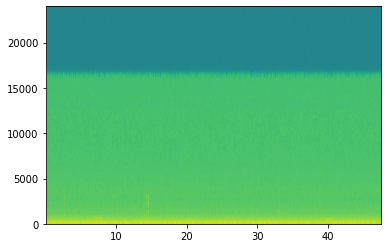

In [41]:
spec, freqs, t, im = plt.specgram(x, Fs=fs)

In [42]:
frequencies, times, spect = spectrogram(x, fs)

/tmp/ipykernel_1472/2517574470.py:1: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



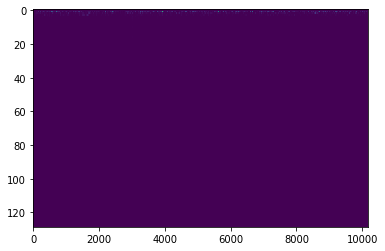

In [43]:
plt.pcolormesh(times, frequencies, spect)
plt.imshow(spect, interpolation='nearest', aspect='auto')
plt.show()

array([[  0],
       [  0],
       [  0],
       ...,
       [291],
       [474],
       [573]], dtype=int16)

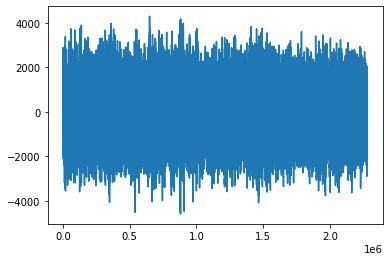

In [44]:
plt.plot(x)
x.reshape((len(x), 1))